In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from scipy.linalg import norm
from sklearn.datasets import make_moons
from ipywidgets import interact, FloatSlider, Dropdown, IntSlider
from sklearn.datasets import make_biclusters, make_moons
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from numpy.linalg import svd
from tensorflow.keras import datasets

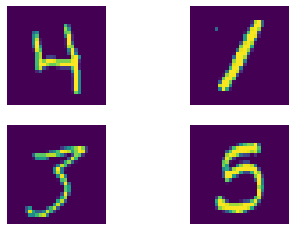

In [2]:
#Definimos train y test como indicado en clase
train, test=datasets.mnist.load_data()
xtrain, ytrain=train

np.random.seed(3141)
indices=np.random.choice(np.arange(len(xtrain)), size=4)
fig, ax=plt.subplots(2, 2)
for axi, ix in zip(ax.ravel(), indices):
    axi.imshow(xtrain[ix])
    axi.axis("off")

## Ejercicio 1

In [51]:
#Creamos un modelo que utilice un pipeline con PCA y KNeighborsClassifier
N, M1, M2=xtrain.shape
N2, M1, M2=xtest.shape
xtest, ytest=test

In [57]:
pca=PCA(n_components=0.7)
KNC=KNeighborsClassifier(n_neighbors=5)

pipe=Pipeline(
    [("pca", pca),
    ("KNC", KNC)]
)

In [58]:
%%time
pipe.fit(xtrain.reshape(N,-1), ytrain)

Wall time: 4.36 s


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.7,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('KNC',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [59]:
xtrain.shape

(60000, 28, 28)

In [67]:
y_pred=pipe.predict(xtest.reshape(N2,-1))

In [68]:
confusion_matrix(ytest, y_pred)

array([[ 971,    1,    1,    0,    0,    1,    5,    1,    0,    0],
       [   0, 1131,    2,    1,    0,    0,    1,    0,    0,    0],
       [   7,    0, 1003,    1,    1,    0,    4,   10,    6,    0],
       [   0,    1,    5,  969,    0,   17,    0,    8,    9,    1],
       [   0,    0,    0,    0,  954,    0,    4,    2,    1,   21],
       [   3,    1,    1,    8,    1,  868,    5,    1,    1,    3],
       [   3,    3,    0,    0,    3,    1,  947,    0,    1,    0],
       [   1,   18,   11,    1,    3,    0,    0,  988,    0,    6],
       [   4,    0,    2,   15,    1,    4,    2,    2,  941,    3],
       [   3,    3,    3,    7,    9,    5,    1,    6,    6,  966]],
      dtype=int64)

## Ejercicio 2

In [83]:
KNC_2=KNeighborsClassifier(n_neighbors=5)

In [84]:
%%time
KNC_2.fit(xtrain.reshape(N,-1), ytrain)

Wall time: 30 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [103]:
y_pred=KNC_2.predict(xtest.reshape(N2,-1))

In [104]:
confusion_matrix(ytest, y_pred)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

## Conclusiones

#### 1.  El segundo ejercicio (sin PCA) que utiliza todas las variables es ligeramente mejor, clasificando nuestros datos pero considerando que tiene mas de 700 variables adicionales podemos decir que es menos eficiente 

#### 2. Como mencionamos anteriormente, el segundo modelo es ligeramente mejor, pero su tiempo de respuesta es significativamente mayor (4 segundos vs.  30 segundos). Por lo que puedo concluir que es mas optimo utilizar PCA.

#### 3 En el primer ejercicio fue sumamente rapido, ya que en un par de segundos corrio, el segundo modelo tomo aproximadamente 10 minutos.